In [1]:
import patchedimage_naive as pnaive
import patchedimage as p
from utilities import *
import time
from matplotlib import pyplot as plt
from matplotlib import ticker

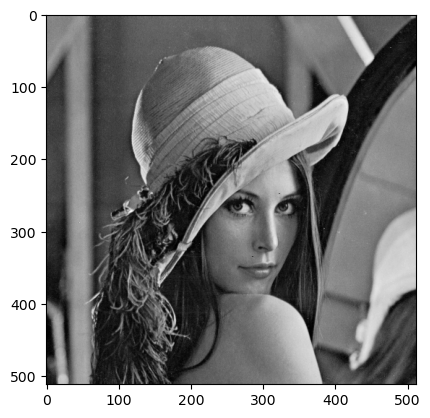

Image shape: (512, 512)


In [2]:
img = plt.imread("images/lena.tif")
plt.imshow(img, cmap='gray')
plt.show()
print("Image shape:", img.shape)   
height, width = img.shape

In [ ]:
patch_sizes = np.arange(1, 11)
time_naive = [1]#np.load("time_naive.npy")
time_avec_zone, time_sans_zone = [],[]#np.load("time_avec_zone.npy"), np.load("time_sans_zone.npy")
masquex1, masquey1, masquex2, masquey2 = height//2-50,width//2-50,height//2+50,width//2+50


print(patch_sizes)

[ 8  9 10]


In [4]:
if len(time_naive) == 0:
    for size in patch_sizes:
        start = time.time()

        imnaiv = pnaive.PatchedImage("images/lena.tif",size,search_mode="Local")
        masque = masque_carre((masquex1, masquey1),(masquex2, masquey2),imnaiv.img.shape,color=False)
        imnaiv.set_masque(draw=False,masque=masque)
        imnaiv.set_priorities()

        res = imnaiv.reconstruction_auto(save_result=True, save_path=f"results/naive/lena-{size}.png")

        time_naive.append(time.time()-start)

    time_naive = np.array(time_naive)
    np.save('time_naive.npy', time_naive)

[] 0
Size of the search zone : 326x326
==Tree construction==
3.005 sec
Reconstruct in 22.320 sec
Saving result


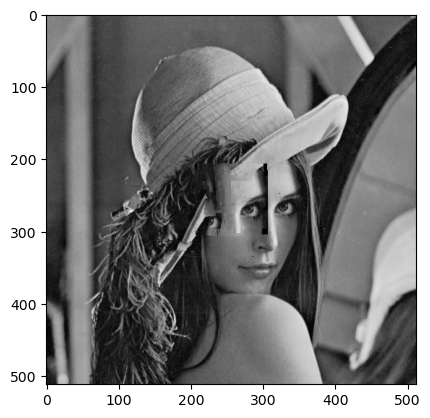

Size of the search zone : 326x326
==Tree construction==
2.991 sec


KeyboardInterrupt: 

In [5]:
print(time_avec_zone, len(time_avec_zone))
if len(time_avec_zone) == 0:
    for size in patch_sizes:
        start = time.time()

        im = p.PatchedImage("images/lena.tif",size,search_mode="Local")
        masque = masque_carre((masquex1, masquey1),(masquex2, masquey2),im.img.shape,color=False)
        im.set_masque(draw=False,masque=masque,leaf_size=256)
        im.set_priorities()

        res = im.reconstruction_auto(save_result=True, save_path=f"results/optilocal/lena-{size}.png")

        time_avec_zone.append(time.time()-start)

    time_avec_zone = np.array(time_avec_zone)
    np.save('execution_time.npy', time_avec_zone)

In [ ]:
if len(time_sans_zone) == 0:
    for size in patch_sizes:
        start = time.time()

        im = p.PatchedImage("images/maison.tif",size,search_mode="Full")
        masque = masque_carre((masquex1, masquey1),(masquex2, masquey2),im.img.shape,color=False)
        im.set_masque(draw=False,masque=masque,leaf_size=256)
        im.set_priorities()

        res = im.reconstruction_auto(save_result=True, save_path=f"results/optilocal/lena-{size}.png")

        time_sans_zone.append(time.time()-start)

    time_sans_zone = np.array(time_sans_zone)
    np.save('time_sans_zone.npy', time_sans_zone)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

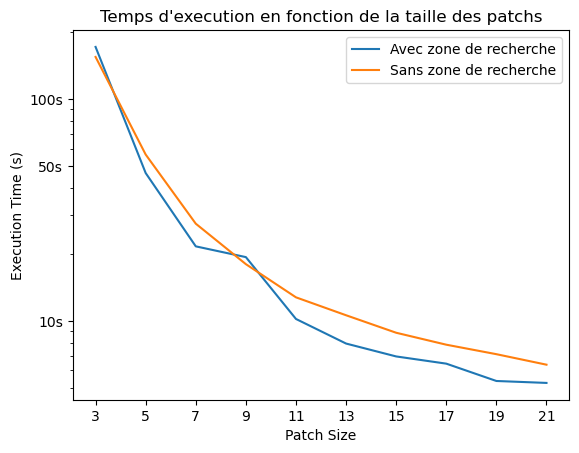

In [ ]:
plt.plot(2*patch_sizes+1, time_avec_zone, label='Avec zone de recherche')
plt.plot(2*patch_sizes+1, time_sans_zone, label='Sans zone de recherche')
plt.xlabel('Patch Size')
plt.ylabel('Execution Time (s)')
plt.title("Temps d'execution en fonction de la taille des patchs")
plt.yscale('log')
plt.yticks([10, 100, 50], ['10s', '100s', '50s'])  # Set y-ticks to nice values
plt.xticks(2*patch_sizes+1)  # Set y-ticks to nice values
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

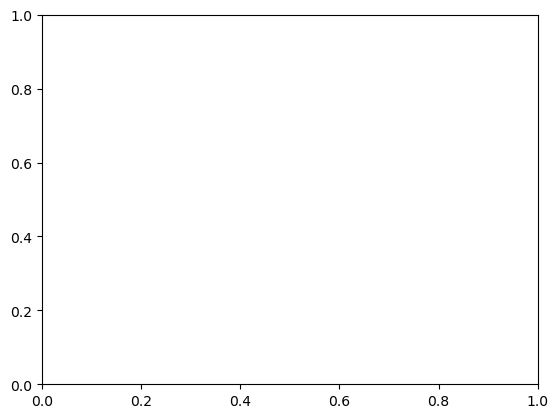

In [ ]:
plt.plot(2*patch_sizes+1, execution_time_naive, label='Naive Execution Time')
plt.plot(2*patch_sizes+1, execution_time, label='Optimized Execution Time')
plt.xlabel('Patch Size')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Patch Size')
plt.yscale('log')
plt.yticks([10, 100, 300], ['10s', '100s', '300s'])  # Set y-ticks to nice values
plt.legend()
plt.show()